**Assignment 09**

**Write a python program to apply Perceptron, SVM, Logistic Regression algorithm on the given data sets using Scikit-learn and also plot accuracy and show the precision, recall, f1-score, support table.**



In [1]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

Saving data.csv to data.csv
Saving wine.csv to wine.csv


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Classifier: Perceptron
              precision    recall  f1-score  support
1              0.058824  0.031250  0.040816   32.000
2              0.049020  0.108696  0.067568   46.000
3              0.157480  0.202020  0.176991   99.000
4              0.263636  0.201389  0.228346  144.000
5              0.395833  0.318436  0.352941  179.000
accuracy       0.224000  0.224000  0.224000    0.224
macro avg      0.184959  0.172358  0.173333  500.000
weighted avg   0.257091  0.224000  0.235989  500.000


Classifier: Logistic Regression
              precision    recall  f1-score  support
1              1.000000  0.000000  0.000000   32.000
2              1.000000  0.000000  0.000000   46.000
3              1.000000  0.000000  0.000000   99.000
4              0.270270  0.208333  0.235294  144.000
5              0.377892  0.821229  0.517606  179.000
accuracy       0.354000  0.354000  0.354000    0.354
macro avg      0.729632  0.205912  0.150580  500.000
weighted avg   0.567123  0.354000  0.25306

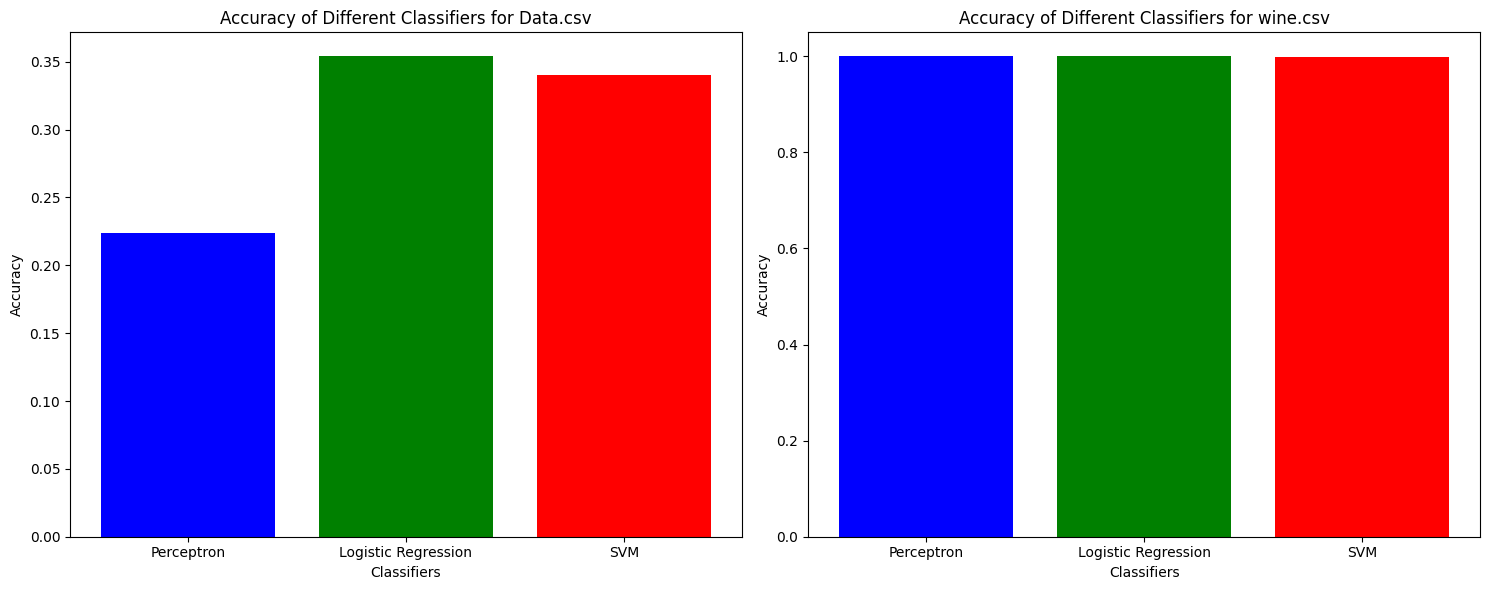

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load datasets
data_df = pd.read_csv('data.csv')
wine_df = pd.read_csv('wine.csv')

# Splitting data into features and target
X_data = data_df.drop('M', axis=1)  # Assuming 'M' is the target column in Data.csv
y_data = data_df['M']

X_wine = wine_df.drop('good/bad', axis=1)  # Assuming 'good/bad' is the target column in wine.csv
y_wine = wine_df['good/bad']

# Standardize features for Data.csv
scaler_data = StandardScaler()
X_data = scaler_data.fit_transform(X_data)

# One-hot encode 'type' column for wine.csv
encoder = OneHotEncoder(sparse=False)
X_wine_encoded = encoder.fit_transform(X_wine[['type']])
X_wine_encoded_df = pd.DataFrame(X_wine_encoded, columns=[f"type_{i}" for i in range(X_wine_encoded.shape[1])])
X_wine = pd.concat([X_wine.drop(columns=['type']), X_wine_encoded_df], axis=1)

# Standardize features for wine.csv
scaler_wine = StandardScaler()
X_wine = scaler_wine.fit_transform(X_wine)

# Splitting data into train and test sets for both datasets
X_data_train, X_data_test, y_data_train, y_data_test = train_test_split(X_data, y_data, test_size=0.2, random_state=42)
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(X_wine, y_wine, test_size=0.2, random_state=42)

# Define classifiers
classifiers = {
    'Perceptron': Perceptron(),
    'Logistic Regression': LogisticRegression(),
    'SVM': SVC()
}

# Training and evaluating classifiers for Data.csv
results_data = {}
for name, clf in classifiers.items():
    clf.fit(X_data_train, y_data_train)
    y_pred = clf.predict(X_data_test)
    accuracy = accuracy_score(y_data_test, y_pred)
    report = classification_report(y_data_test, y_pred, output_dict=True, zero_division=1)
    results_data[name] = {
        'accuracy': accuracy,
        'classification_report': report,
        'y_pred': y_pred  # Storing predictions for later use
    }

# Training and evaluating classifiers for wine.csv
results_wine = {}
for name, clf in classifiers.items():
    clf.fit(X_wine_train, y_wine_train)
    y_pred = clf.predict(X_wine_test)
    accuracy = accuracy_score(y_wine_test, y_pred)
    report = classification_report(y_wine_test, y_pred, output_dict=True, zero_division=1)
    results_wine[name] = {
        'accuracy': accuracy,
        'classification_report': report,
        'y_pred': y_pred  # Storing predictions for later use
    }

# Showing precision, recall, f1-score, support table for Data.csv
for name, result in results_data.items():
    print(f"Classifier: {name}")
    print(pd.DataFrame(result['classification_report']).transpose())
    print("\n")

# Showing precision, recall, f1-score, support table for wine.csv
for name, result in results_wine.items():
    print(f"Classifier: {name}")
    print(pd.DataFrame(result['classification_report']).transpose())
    print("\n")

# Plotting accuracy for both datasets
plt.figure(figsize=(15, 6))

# Plotting accuracy for Data.csv
plt.subplot(1, 2, 1)
names_data = list(results_data.keys())
values_data = [results_data[name]['accuracy'] for name in names_data]
plt.bar(names_data, values_data, color=['blue', 'green', 'red'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers for Data.csv')

# Plotting accuracy for wine.csv
plt.subplot(1, 2, 2)
names_wine = list(results_wine.keys())
values_wine = [results_wine[name]['accuracy'] for name in names_wine]
plt.bar(names_wine, values_wine, color=['blue', 'green', 'red'])
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Classifiers for wine.csv')

plt.tight_layout()
plt.show()



**Clean the data and generate an insight on different parameters present in the dataset and give a clear picture on how the Instagram influencer can get more reach? Which parameter is more important for the influencer to work upon and why? Give a detailed explanation with proper statistical proof**

In [23]:
from google.colab import files

# Upload the CSV file
uploaded = files.upload()

Saving Instagram_data.csv to Instagram_data.csv


<ipython-input-27-37818c383974>:25: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


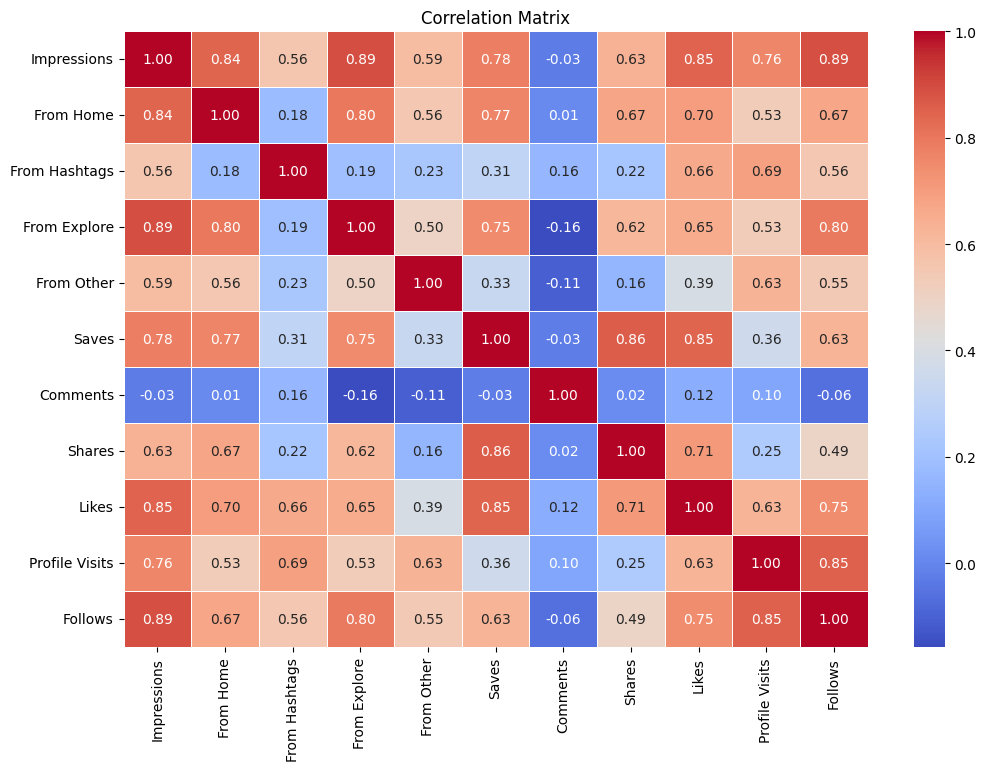

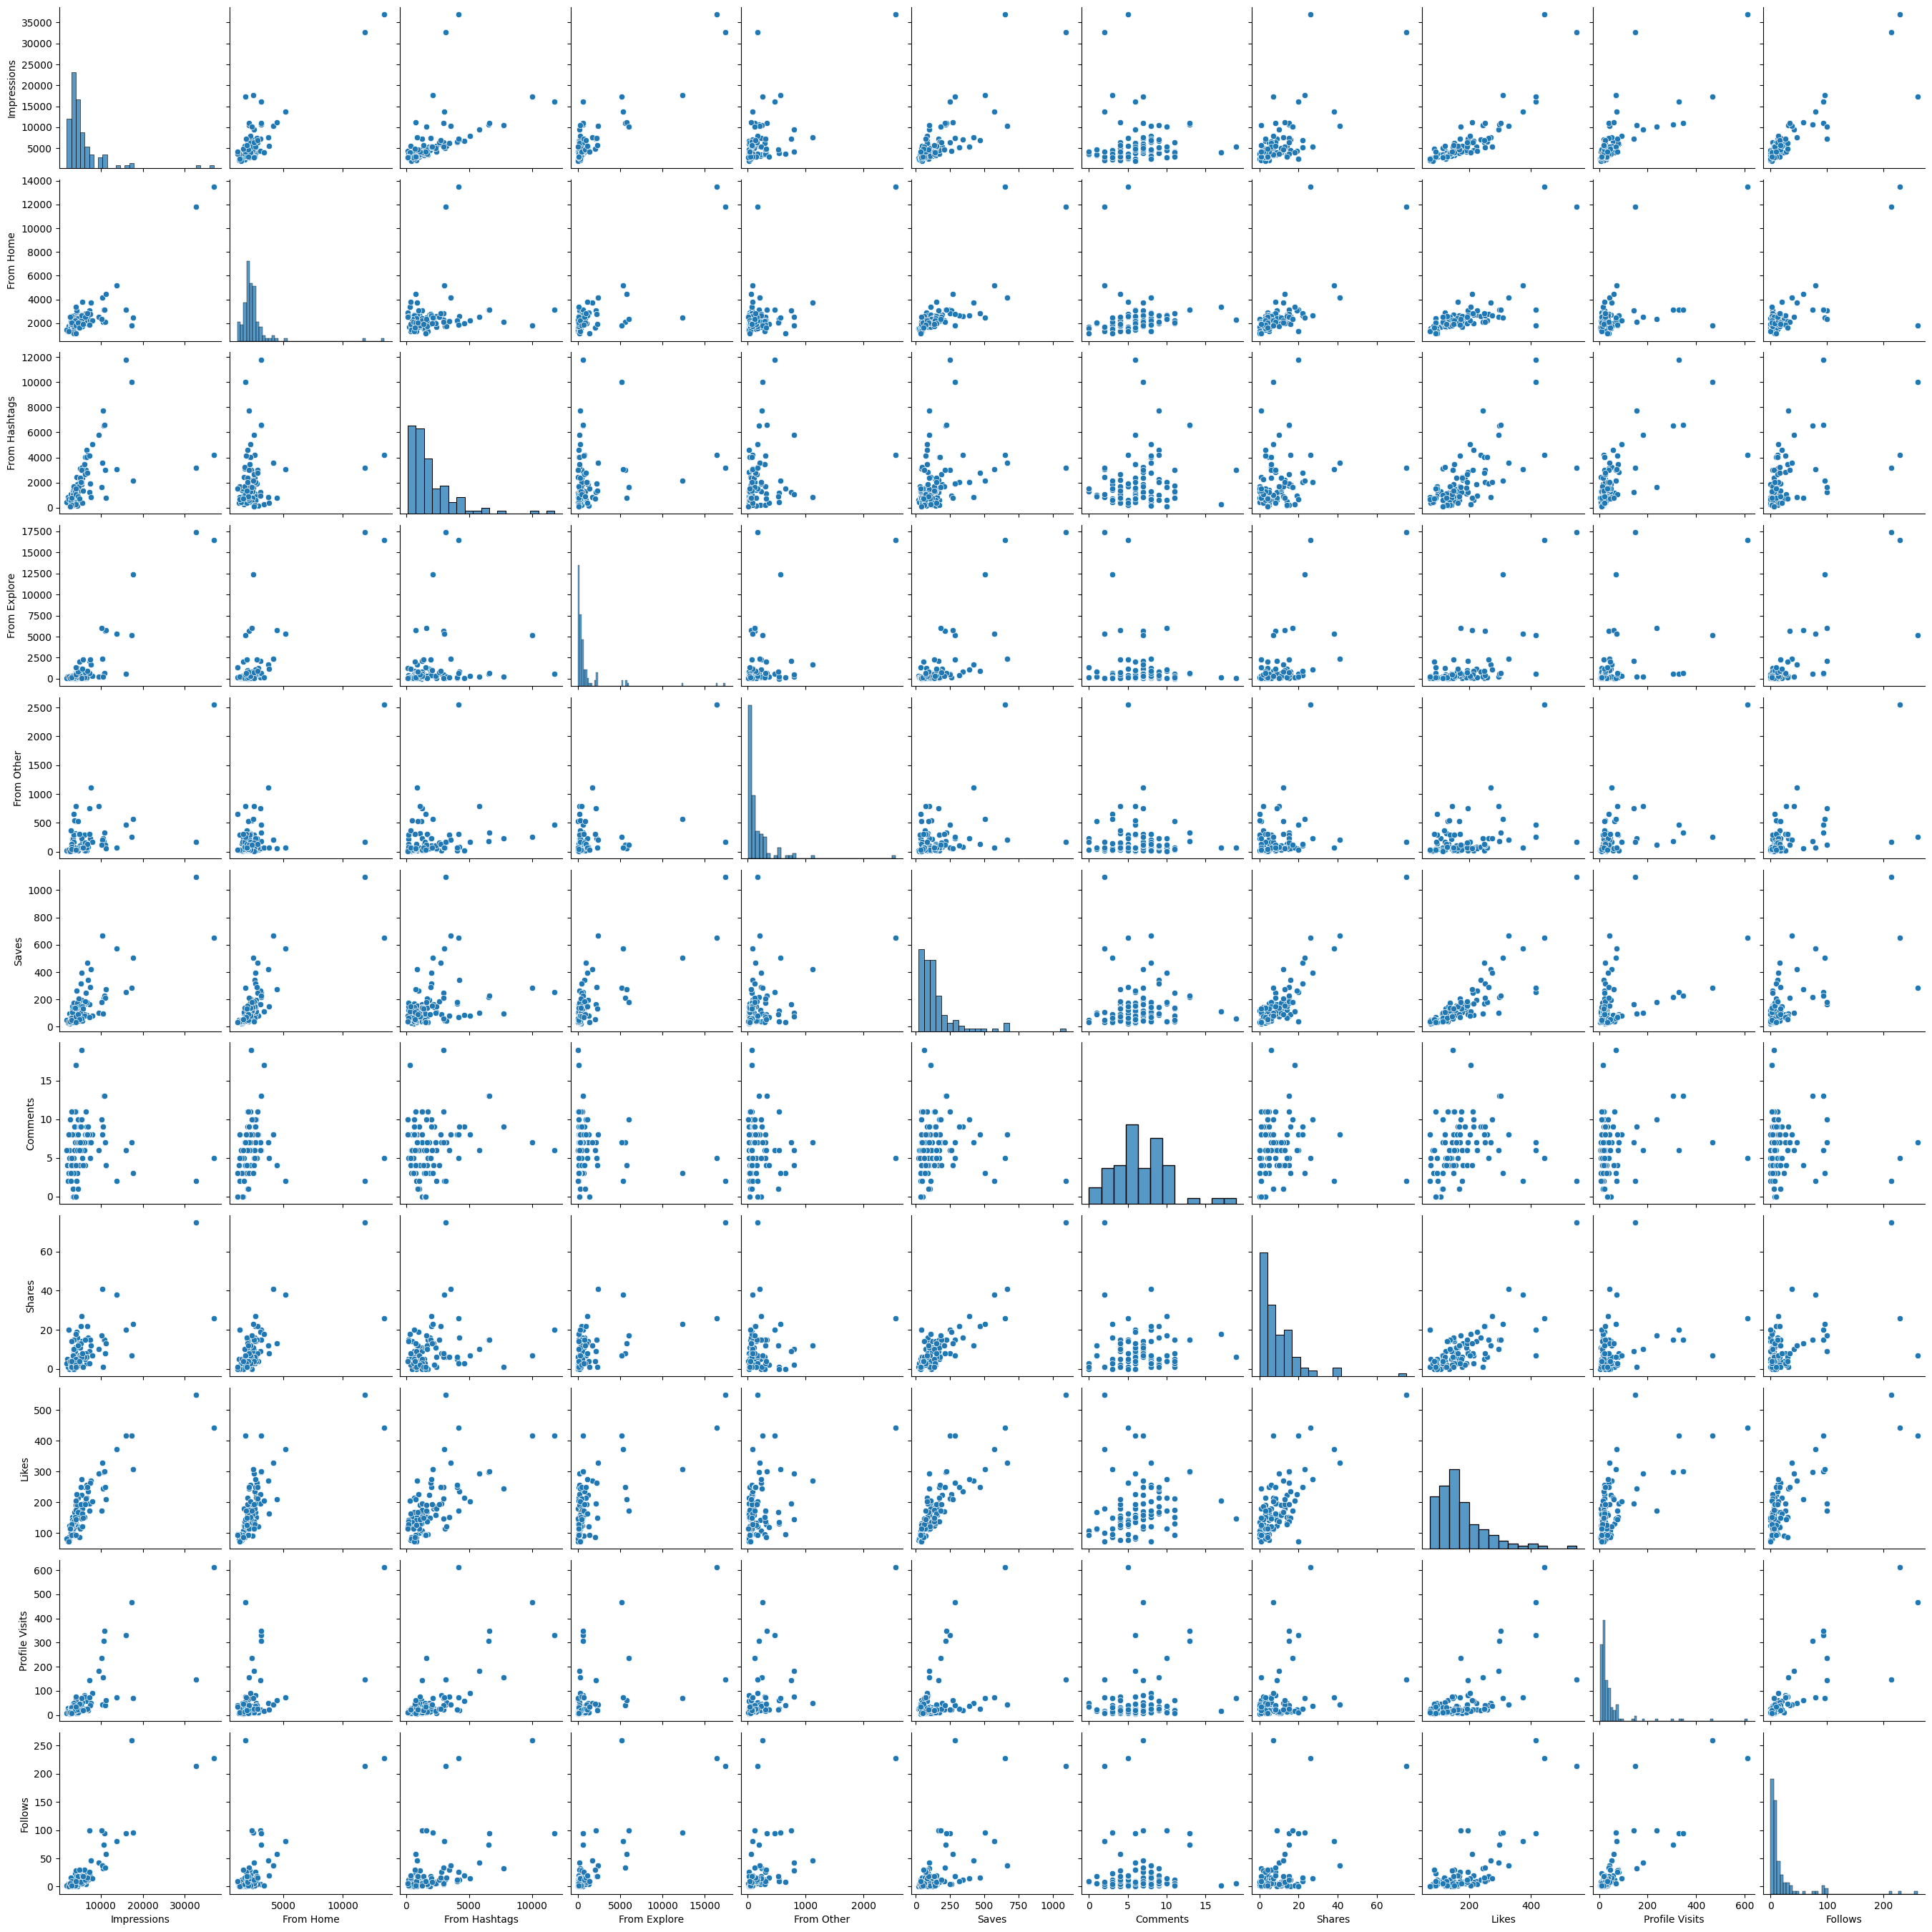

Summary Statistics:
         Impressions     From Home  From Hashtags  From Explore   From Other  \
count    119.000000    119.000000     119.000000    119.000000   119.000000   
mean    5703.991597   2475.789916    1887.512605   1078.100840   171.092437   
std     4843.780105   1489.386348    1884.361443   2613.026132   289.431031   
min     1941.000000   1133.000000     116.000000      0.000000     9.000000   
25%     3467.000000   1945.000000     726.000000    157.500000    38.000000   
50%     4289.000000   2207.000000    1278.000000    326.000000    74.000000   
75%     6138.000000   2602.500000    2363.500000    689.500000   196.000000   
max    36919.000000  13473.000000   11817.000000  17414.000000  2547.000000   

             Saves    Comments      Shares       Likes  Profile Visits  \
count   119.000000  119.000000  119.000000  119.000000      119.000000   
mean    153.310924    6.663866    9.361345  173.781513       50.621849   
std     156.317731    3.544576   10.089205   

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load the dataset with different encodings
try:
    data = pd.read_csv("Instagram_data.csv", encoding='utf-8')
except UnicodeDecodeError:
    try:
        data = pd.read_csv("Instagram_data.csv", encoding='utf-8-sig')
    except UnicodeDecodeError:
        try:
            data = pd.read_csv("Instagram_data.csv", encoding='latin1')
        except UnicodeDecodeError:
            data = pd.read_csv("Instagram_data.csv", encoding='ISO-8859-1')

# Data Cleaning
data.dropna(inplace=True)
numeric_cols = ['Impressions', 'From Home', 'From Hashtags', 'From Explore', 'From Other', 'Saves', 'Comments', 'Shares', 'Likes', 'Profile Visits', 'Follows']
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric)

# Exploratory Data Analysis (EDA)
summary_stats = data.describe()
correlation_matrix = data.corr()

# Insights Generation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

sns.pairplot(data)
plt.show()

# Identifying the most important parameter
correlation_with_impressions = correlation_matrix['Impressions'].abs().sort_values(ascending=False)
most_correlated_param = correlation_with_impressions.index[1]
corr_coeff, p_value = pearsonr(data[most_correlated_param], data['Impressions'])

print("Summary Statistics:\n", summary_stats)
print("Correlation with Impressions:\n", correlation_with_impressions)
print("Correlation Coefficient between '{}' and 'Impressions': {:.2f}".format(most_correlated_param, corr_coeff))
print("P-value:", p_value)
